# Homework 8 Assignment 1

Prepared by eb3237

## Instructions:
  
## Create a plot

Create a plot, of whatever data (and models if you want) you choose from data of urban relevance (you can use any dataset we used in class, or something else, use your judgement here, but please no footbal statistics, or star flares. If you have doubt about whether your dataset is relevant for this homework please email me.) You can make the plot in any coding language you want (e.g. python, javascript, R...), as long as you upload the code that generates the plot onto this repo (which means no tableau, or any other non reproducible - carto is an exception, since you can see the processing tasks).

Create a directory HW8_ in your PUI repo (with your netID). The plot neads to be uploaded onto the HW8 folder in your github PUI repo and be embedded in the README.md. That means: when I click on the HW8 link the plot must be rendered in the front page of the repo. Your readme must contain the plot, and a brief caption. If it is an interactive graphic, upload a static image of it in the README and provide a link to the interactive version.

Please make an effor to make it a good, compelling graphic. Put though into the esthetic of the plot, how clearly the content is communicated, avoid clutter, avoid misleading elements, mind your choice of colors accordingly to what was discussed in class.

Each of you needs to upload their own plot, no group submissions.

If your plot shows up as I described above in the repo and the code is also uploaded you will get 100% of the HW points. (Next week you will be tasked to review 3 plots of your classmates and you will be graded on the quality of the review.)


In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import sys
import os
import pylab as pl
import statsmodels.formula.api as smf
import geopandas as gp
from shapely.geometry import Point
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


https://www.zillow.com/research/data/


https://en.wikipedia.org/wiki/List_of_cities_in_Texas_by_population


https://www.missouri-demographics.com/cities_by_population



In [2]:
# check for PUIdata env var
PUIdata = os.getenv("PUIDATA")
"The path to the PUIdata directory is " + PUIdata

'The path to the PUIdata directory is /nfshome/eb3237/PUIdata'

In [3]:
!wget http://files.zillowstatic.com/research/public/City/City_MedianListingPrice_AllHomes.csv

--2018-11-06 12:04:27--  http://files.zillowstatic.com/research/public/City/City_MedianListingPrice_AllHomes.csv
Resolving files.zillowstatic.com (files.zillowstatic.com)... 52.84.94.185, 52.84.94.248, 52.84.94.31, ...
Connecting to files.zillowstatic.com (files.zillowstatic.com)|52.84.94.185|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4352691 (4.2M) [binary/octet-stream]
Saving to: ‘City_MedianListingPrice_AllHomes.csv.4’

City_MedianListingP 100%[===================>]   4.15M  5.87MB/s    in 0.7s    

2018-11-06 12:04:28 (5.87 MB/s) - ‘City_MedianListingPrice_AllHomes.csv.4’ saved [4352691/4352691]



In [4]:
#move data to $PUIDATA, and read data in 
cmd = "City_MedianListingPrice_AllHomes.csv" + os.getenv("PUIDATA")
#the line below is to check that my string is formatted right. I should remove it to make the notebook delivery ready
print (cmd)


City_MedianListingPrice_AllHomes.csv/nfshome/eb3237/PUIdata


In [5]:
df = pd.read_csv('http://files.zillowstatic.com/research/public/City/City_MedianListingPrice_AllHomes.csv')
df

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
0,New York,NY,New York-Newark-Jersey City,Queens,1,459000.0,449990.0,429900.0,430000.0,449000.0,...,850000.0,845000.0,829000.0,799000.0,808000.0,850000.0,848000.0,835000.0,800000.0,825000.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,434900.0,419000.0,429000.0,429000.0,429000.0,...,749999.0,759925.0,779974.5,788000.0,799000.0,799000.0,799998.0,799900.0,799000.0,799000.0
2,Chicago,IL,Chicago-Naperville-Elgin,Cook,3,269800.0,274500.0,272500.0,272138.0,269000.0,...,285000.0,294800.0,309500.0,324500.0,329000.0,325519.0,325000.0,324900.0,319900.0,324900.0
3,Houston,TX,Houston-The Woodlands-Sugar Land,Harris,4,NaN,NaN,NaN,NaN,NaN,...,324999.0,325000.0,329000.0,331737.0,336990.0,335000.0,334500.0,328194.5,324190.0,325000.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar,5,145000.0,147000.0,149000.0,149900.0,150944.0,...,233765.5,233900.0,230995.0,229975.0,235000.0,239888.0,239900.0,239499.5,236000.0,236534.5
5,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia,6,141700.0,149900.0,159900.0,157000.0,159900.0,...,190000.0,189900.0,195000.0,199900.0,206450.0,216900.0,224500.0,220000.0,215000.0,214900.0
6,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa,7,144900.0,139900.0,138600.0,135000.0,129950.0,...,270000.0,274990.0,279000.0,279999.0,289000.0,289000.0,285000.0,282900.0,279999.0,279650.0
7,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark,8,150000.0,150000.0,150000.0,149900.0,147900.0,...,285000.0,285000.0,286282.5,285000.0,289900.0,293000.0,295000.0,299000.0,305000.0,300000.0
8,San Diego,CA,San Diego-Carlsbad,San Diego,9,435000.0,439900.0,429000.0,430000.0,439000.0,...,624000.0,629000.0,638000.0,649000.0,659000.0,709000.0,699900.0,699000.0,689000.0,685000.0
9,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas,10,209000.0,209000.0,216900.0,219900.0,222900.0,...,375000.0,374949.5,394000.0,399000.0,400000.0,400000.0,399000.0,399000.0,385000.0,385000.0


In [6]:
df.columns

Index(['RegionName', 'State', 'Metro', 'CountyName', 'SizeRank', '2010-01',
       '2010-02', '2010-03', '2010-04', '2010-05',
       ...
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09'],
      dtype='object', length=110)

In [7]:
#selecting last year only
df = df.drop([u'Metro', u'CountyName', u'SizeRank',
              u'2010-01', u'2010-02', u'2010-03', u'2010-04', u'2010-05', u'2010-06',
       u'2010-07', u'2010-08', u'2010-09', u'2010-10', u'2010-11', u'2010-12',
       u'2011-01', u'2011-02', u'2011-03', u'2011-04', u'2011-05', u'2011-06',
       u'2011-07', u'2011-08', u'2011-09', u'2011-10', u'2011-11', u'2011-12',
       u'2012-01', u'2012-02', u'2012-03', u'2012-04', u'2012-05', u'2012-06',
       u'2012-07', u'2012-08', u'2012-09', u'2012-10', u'2012-11', u'2012-12',
       u'2013-01', u'2013-02', u'2013-03', u'2013-04', u'2013-05', u'2013-06',
       u'2013-07', u'2013-08', u'2013-09', u'2013-10', u'2013-11', u'2013-12',
       u'2014-01', u'2014-02', u'2014-03', u'2014-04', u'2014-05', u'2014-06',
       u'2014-07', u'2014-08', u'2014-09', u'2014-10', u'2014-11', u'2014-12',
       u'2015-01', u'2015-02', u'2015-03', u'2015-04', u'2015-05', u'2015-06',
       u'2015-07', u'2015-08', u'2015-09', u'2015-10', u'2015-11', u'2015-12',
       u'2016-01', u'2016-02', u'2016-03', u'2016-04', u'2016-05', u'2016-06',
       u'2016-07', u'2016-08', u'2016-09', '2016-10', u'2016-11', u'2016-12',
       u'2017-01', u'2017-02', u'2017-03', u'2017-04', u'2017-05', u'2017-06',
       u'2017-07', u'2017-08', u'2017-09'], axis = 1)
df.head()

,RegionName,State,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
0,New York,NY,859000.0,870000.0,850000.0,845000.0,829000.0,799000.0,808000.0,850000.0,848000.0,835000.0,800000.0,825000.0
1,Los Angeles,CA,749950.0,749925.0,749999.0,759925.0,779974.5,788000.0,799000.0,799000.0,799998.0,799900.0,799000.0,799000.0
2,Chicago,IL,299500.0,295000.0,285000.0,294800.0,309500.0,324500.0,329000.0,325519.0,325000.0,324900.0,319900.0,324900.0
3,Houston,TX,325000.0,325000.0,324999.0,325000.0,329000.0,331737.0,336990.0,335000.0,334500.0,328194.5,324190.0,325000.0
4,San Antonio,TX,235000.0,234900.0,233765.5,233900.0,230995.0,229975.0,235000.0,239888.0,239900.0,239499.5,236000.0,236534.5


### selecting top 7 cities in Texas

In [8]:

df1 = df[df['State'].str.contains('TX')]
df1.head(10)

,RegionName,State,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
3,Houston,TX,325000.0,325000.0,324999.0,325000.0,329000.0,331737.0,336990.0,335000.0,334500.0,328194.5,324190.0,325000.0
4,San Antonio,TX,235000.0,234900.0,233765.5,233900.0,230995.0,229975.0,235000.0,239888.0,239900.0,239499.5,236000.0,236534.5
9,Dallas,TX,379900.0,379000.0,375000.0,374949.5,394000.0,399000.0,400000.0,400000.0,399000.0,399000.0,385000.0,385000.0
11,Austin,TX,390000.0,380000.0,380245.0,375769.0,379775.0,387250.0,389000.0,389900.0,395000.0,395000.0,387500.0,384900.0
16,Fort Worth,TX,238400.0,239900.0,240495.0,243500.0,249000.0,249900.0,252049.0,255000.0,256630.0,255000.0,254900.0,255000.0
20,El Paso,TX,167000.0,166800.0,165950.0,165000.0,165000.0,164900.0,165000.0,165000.0,169361.0,169747.5,169925.0,168000.0
51,Arlington,TX,219500.0,220000.0,219900.0,225000.0,229000.0,232900.0,235000.0,239900.0,240000.0,240000.0,239900.0,240000.0
66,Corpus Christi,TX,202500.0,203500.0,205250.0,206900.0,209900.0,213500.0,215000.0,214997.0,214900.0,214900.0,211950.0,214900.0
79,Plano,TX,375000.0,369900.0,369900.0,375000.0,375000.0,384900.0,385000.0,385000.0,386250.0,379900.0,375000.0,379900.0
85,Lubbock,TX,199900.0,200000.0,198000.0,189900.0,192000.0,198000.0,203050.0,199950.0,199900.0,199950.0,199000.0,194900.0


In [9]:
df1 = df1.iloc[:5]
df1

,RegionName,State,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
3,Houston,TX,325000.0,325000.0,324999.0,325000.0,329000.0,331737.0,336990.0,335000.0,334500.0,328194.5,324190.0,325000.0
4,San Antonio,TX,235000.0,234900.0,233765.5,233900.0,230995.0,229975.0,235000.0,239888.0,239900.0,239499.5,236000.0,236534.5
9,Dallas,TX,379900.0,379000.0,375000.0,374949.5,394000.0,399000.0,400000.0,400000.0,399000.0,399000.0,385000.0,385000.0
11,Austin,TX,390000.0,380000.0,380245.0,375769.0,379775.0,387250.0,389000.0,389900.0,395000.0,395000.0,387500.0,384900.0
16,Fort Worth,TX,238400.0,239900.0,240495.0,243500.0,249000.0,249900.0,252049.0,255000.0,256630.0,255000.0,254900.0,255000.0


In [10]:
df1 = df1.drop([u'State'], axis = 1)


In [11]:
#setting index for future work

df1.set_index("RegionName", inplace=True)
df1

,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
RegionName,,,,,,,,,,,,
Houston,325000.0,325000.0,324999.0,325000.0,329000.0,331737.0,336990.0,335000.0,334500.0,328194.5,324190.0,325000.0
San Antonio,235000.0,234900.0,233765.5,233900.0,230995.0,229975.0,235000.0,239888.0,239900.0,239499.5,236000.0,236534.5
Dallas,379900.0,379000.0,375000.0,374949.5,394000.0,399000.0,400000.0,400000.0,399000.0,399000.0,385000.0,385000.0
Austin,390000.0,380000.0,380245.0,375769.0,379775.0,387250.0,389000.0,389900.0,395000.0,395000.0,387500.0,384900.0
Fort Worth,238400.0,239900.0,240495.0,243500.0,249000.0,249900.0,252049.0,255000.0,256630.0,255000.0,254900.0,255000.0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


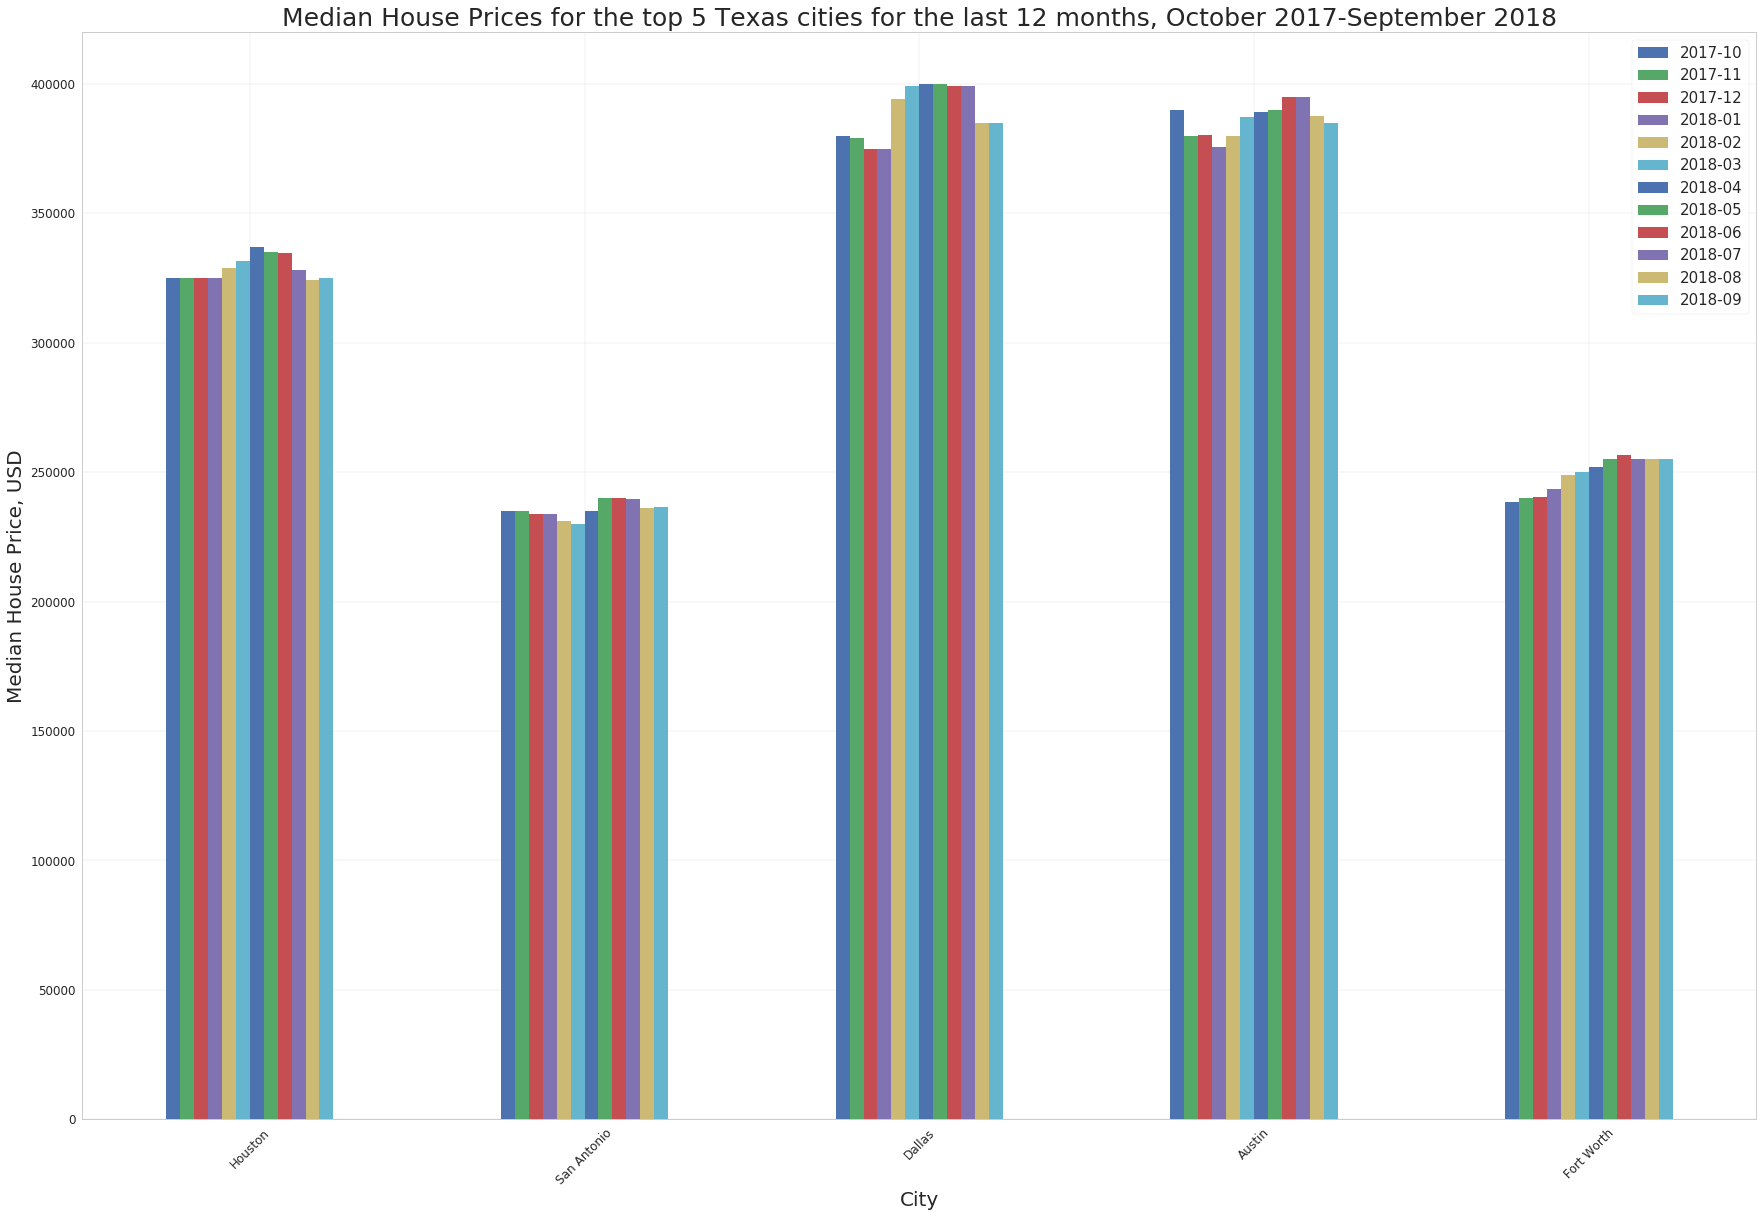

In [12]:
from matplotlib import colors as mcolors

pl.figure(figsize = (20,10))
sns.set_style("whitegrid")
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

df1.plot(kind='bar', figsize=(30,20))
pl.title('Median House Prices for the top 5 Texas cities for the last 12 months, October 2017-September 2018', fontsize=25)
pl.xlabel('City', fontsize=20)
pl.ylabel('Median House Price, USD', fontsize=20)
pl.xticks(fontsize = 12, rotation=45)
pl.yticks(fontsize = 12)
pl.legend(fontsize = 15, frameon=True)
plt.grid(linewidth=0.25)

(200000, 420000.0)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


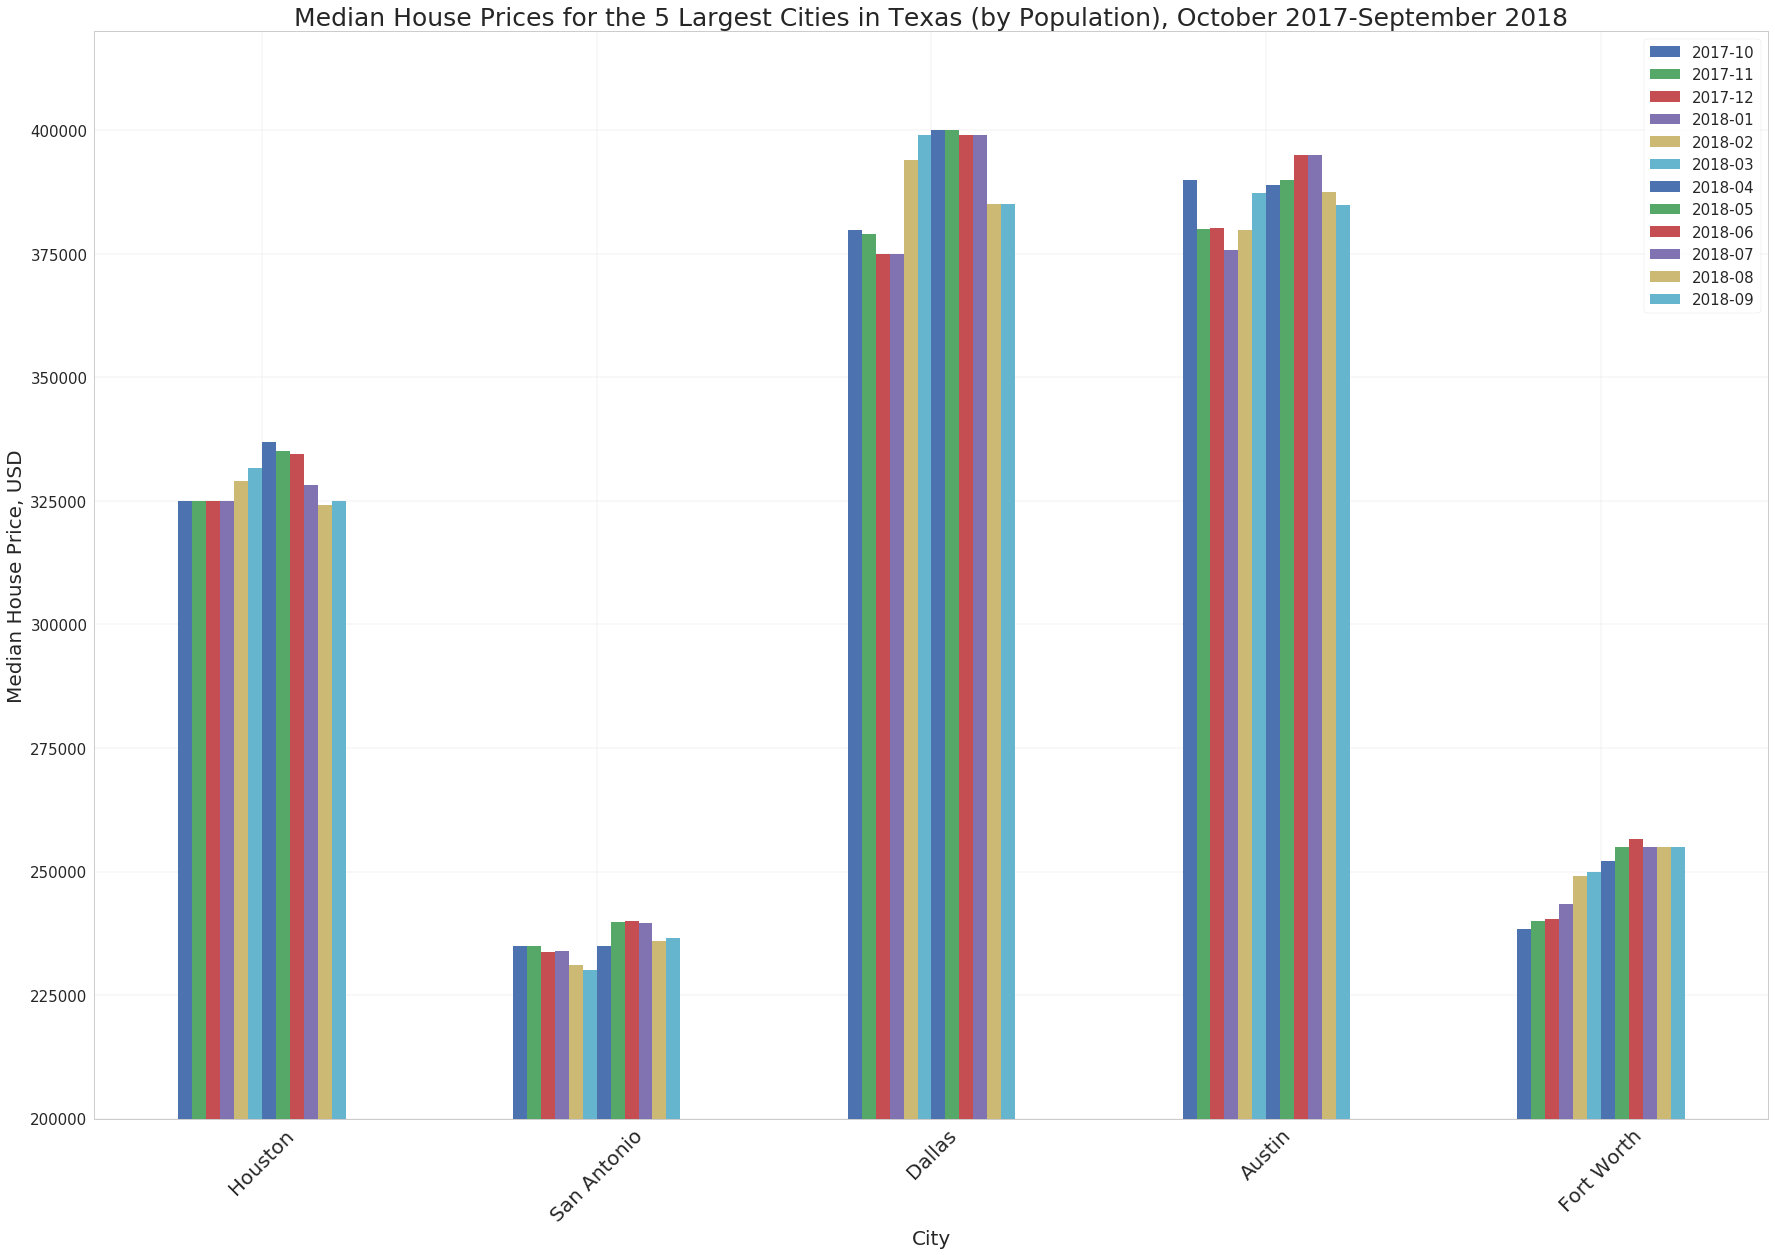

In [44]:
pl.figure(figsize = (15,15))
sns.set_style("whitegrid")
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

df1.plot(kind='bar', figsize=(30,20))
pl.title('Median House Prices for the 5 Largest Cities in Texas (by Population), October 2017-September 2018', fontsize=25)
pl.xlabel('City', fontsize=20)
pl.ylabel('Median House Price, USD', fontsize=20)
pl.xticks(fontsize = 20, rotation=45)
pl.yticks(fontsize = 15)
pl.legend(fontsize = 15, frameon=True)
plt.grid(linewidth=0.25)

plt.ylim(ymin=200000)  # this line
#ymin=200000

In [14]:
df1_1 = df1.T
df1_1

RegionName,Houston,San Antonio,Dallas,Austin,Fort Worth
2017-10,325000.0,235000.0,379900.0,390000.0,238400.0
2017-11,325000.0,234900.0,379000.0,380000.0,239900.0
2017-12,324999.0,233765.5,375000.0,380245.0,240495.0
2018-01,325000.0,233900.0,374949.5,375769.0,243500.0
2018-02,329000.0,230995.0,394000.0,379775.0,249000.0
2018-03,331737.0,229975.0,399000.0,387250.0,249900.0
2018-04,336990.0,235000.0,400000.0,389000.0,252049.0
2018-05,335000.0,239888.0,400000.0,389900.0,255000.0
2018-06,334500.0,239900.0,399000.0,395000.0,256630.0
2018-07,328194.5,239499.5,399000.0,395000.0,255000.0


In [15]:
#df1_1.columns = df1['RegionName']
df1_1['month'] = df1_1.index
df1_1

RegionName,Houston,San Antonio,Dallas,Austin,Fort Worth,month
2017-10,325000.0,235000.0,379900.0,390000.0,238400.0,2017-10
2017-11,325000.0,234900.0,379000.0,380000.0,239900.0,2017-11
2017-12,324999.0,233765.5,375000.0,380245.0,240495.0,2017-12
2018-01,325000.0,233900.0,374949.5,375769.0,243500.0,2018-01
2018-02,329000.0,230995.0,394000.0,379775.0,249000.0,2018-02
2018-03,331737.0,229975.0,399000.0,387250.0,249900.0,2018-03
2018-04,336990.0,235000.0,400000.0,389000.0,252049.0,2018-04
2018-05,335000.0,239888.0,400000.0,389900.0,255000.0,2018-05
2018-06,334500.0,239900.0,399000.0,395000.0,256630.0,2018-06
2018-07,328194.5,239499.5,399000.0,395000.0,255000.0,2018-07


In [16]:
df1_1.columns
#df1_1 = df1_1.set_index(inplace=True)
#df1_1

Index(['Houston', 'San Antonio', 'Dallas', 'Austin', 'Fort Worth', 'month'], dtype='object', name='RegionName')

In [20]:
cities = ['Houston', 'San Antonio', 'Dallas', 'Austin', 'Fort Worth']#, 'El Paso',
       #'Arlington']

In [21]:
#df1_1[cities] = df1_1[cities].apply(lambda x: x/1000)

NameError: name 'txt' is not defined

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


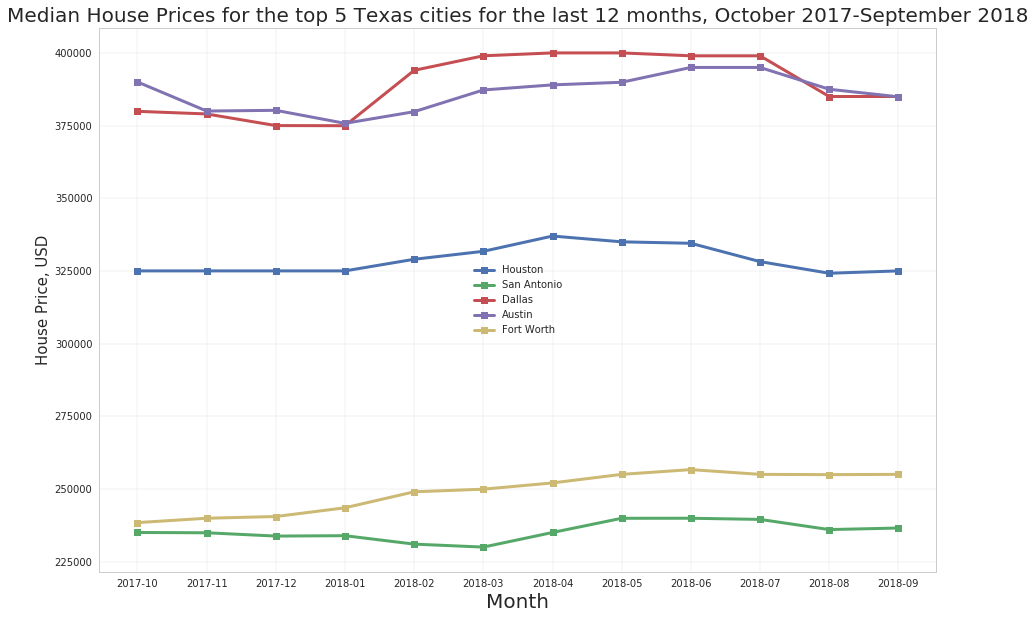

In [22]:
from matplotlib import colors as mcolors

fig, ax = plt.subplots(1,1, figsize = (15,10))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

for c in cities:
 
    ax.plot(df1_1['month'], df1_1[c], marker = 's', label = c, linewidth=3)
    
ax.set_xlabel('Month', fontsize = 20)
ax.set_ylabel('House Price, USD', fontsize = 15)
pl.xlabel('Month', fontsize=20)
ax.set_title('Median House Prices for the top 5 Texas cities for the last 12 months, October 2017-September 2018', fontsize = 20)
ax.legend(loc = 'center')
plt.grid(linewidth=0.25)
#fig.text(0.5, 0.05, txt, ha = 'center', fontsize = 20 )


In [23]:
cities_TX = ['Houston', 'San Antonio', 'Dallas', 'Austin', 'Fort Worth']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


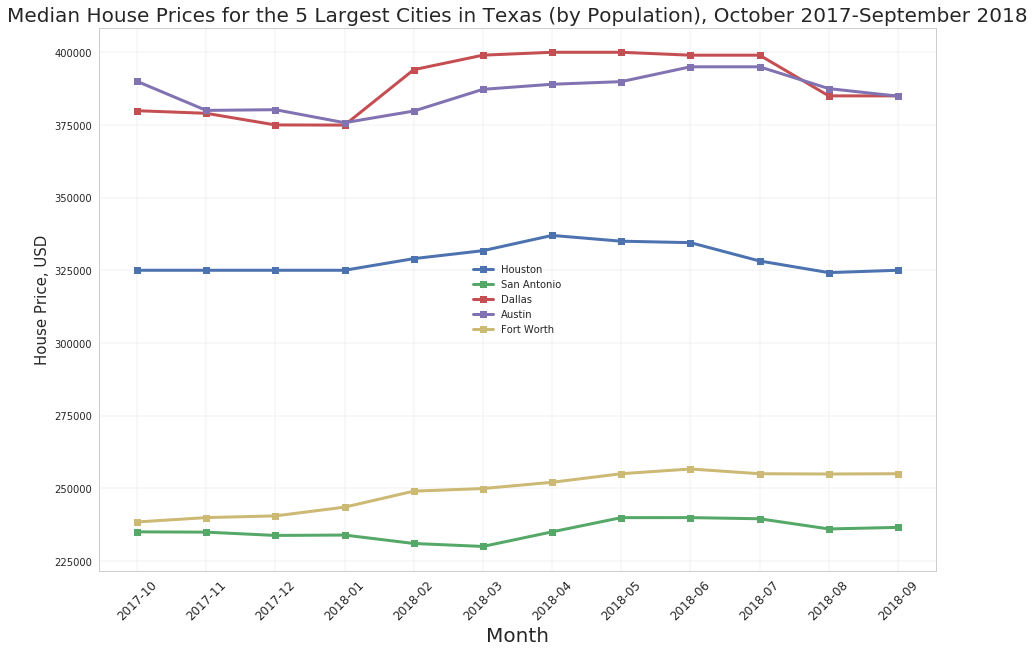

In [45]:
from matplotlib import colors as mcolors

fig, ax = plt.subplots(1,1, figsize = (15,10))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

for c in cities_TX:
 
    ax.plot(df1_1['month'], df1_1[c], marker = 's', label = c, linewidth=3)
    
ax.set_xlabel('Month', fontsize = 20)
ax.set_ylabel('House Price, USD', fontsize = 15)
ax.set_title('Median House Prices for the 5 Largest Cities in Texas (by Population), October 2017-September 2018', fontsize = 20)
pl.xticks(fontsize = 12, rotation=45)
ax.legend(loc = 'center')

#txt = 'Fig1: This plot shows the trend of median housing prices in the top 5 Texas cities over the past 12 months'
#fig.text(0.5, 0.05, txt, ha = 'center', fontsize = 20 )
plt.grid(linewidth=0.25)